<a href="https://colab.research.google.com/github/aafreen2212/DL/blob/master/DL_Assignment_3(Cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras.layers import Dense
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
#Load the data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
#Analyse the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#Data Manipulation
#convert from 2d - 32 X 32 X 3 to 784
X_train = X_train.reshape((50000,32*32*3))

print(X_train.shape)

X_test = X_test.reshape((10000,32*32*3))
print(X_test.shape)
#normalize
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#Categorical to one-hot encoding
y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train,10)

(50000, 3072)
(10000, 3072)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [6]:
#First initializer
#set to a constant value
model_1 = Sequential()
initial = keras.initializers.Constant(value=0.45)
model_1.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_1.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_1.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

In [7]:
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 74us/step - loss: 2.1241 - accuracy: 0.2082 - val_loss: 1.9743 - val_accuracy: 0.2834
Epoch 2/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.9094 - accuracy: 0.3088 - val_loss: 1.8740 - val_accuracy: 0.3329
Epoch 3/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.8357 - accuracy: 0.3501 - val_loss: 1.8095 - val_accuracy: 0.3636
Epoch 4/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.7906 - accuracy: 0.3666 - val_loss: 1.7880 - val_accuracy: 0.3680
Epoch 5/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.7597 - accuracy: 0.3743 - val_loss: 1.7799 - val_accuracy: 0.3704
Epoch 6/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.7393 - accuracy: 0.3834 - val_loss: 1.7535 - val_accuracy: 0.3777
Epoch 7/100
40000/40000 [==============================] - 3s 

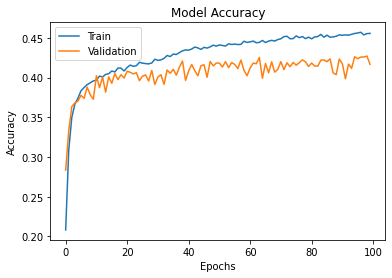

In [8]:
#plot of Accuracy
import matplotlib.pyplot as plt

plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

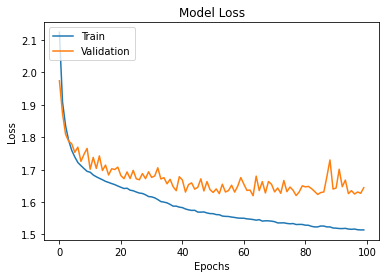

In [9]:
#Plot of loss 
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [10]:
#Second Initializer
#pick values from a normal distribution
model_2 = Sequential()
initial = keras.initializers.RandomNormal(mean=0.0, stddev=0.25)
model_2.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_2.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_2.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])


In [11]:
history_2 = model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 67us/step - loss: 2.1298 - accuracy: 0.1940 - val_loss: 2.0033 - val_accuracy: 0.2566
Epoch 2/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.9378 - accuracy: 0.2999 - val_loss: 1.8999 - val_accuracy: 0.3273
Epoch 3/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.8530 - accuracy: 0.3382 - val_loss: 1.8421 - val_accuracy: 0.3426
Epoch 4/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.8036 - accuracy: 0.3571 - val_loss: 1.8171 - val_accuracy: 0.3542
Epoch 5/100
40000/40000 [==============================] - 3s 69us/step - loss: 1.7793 - accuracy: 0.3633 - val_loss: 1.8671 - val_accuracy: 0.3309
Epoch 6/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.7637 - accuracy: 0.3715 - val_loss: 1.7847 - val_accuracy: 0.3622
Epoch 7/100
40000/40000 [==============================] - 3s 

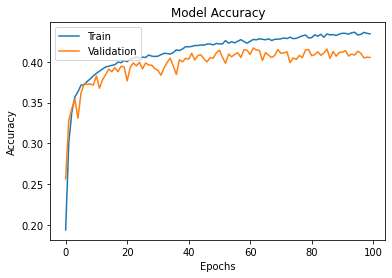

In [12]:
#Plot of Accuracy
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

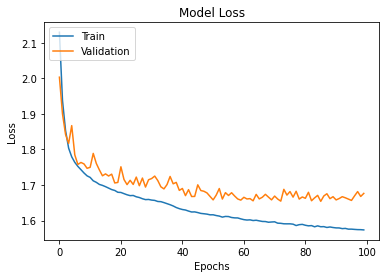

In [13]:
#Plot of loss 
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [14]:
#Third Initializer
#pick uniformly at random from an interval
model_3 = Sequential()
initial_randintv = keras.initializers.RandomUniform(minval=-0.05, maxval= -0.05)
model_3.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_3.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_3.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])
history_3 = model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 73us/step - loss: 2.1550 - accuracy: 0.1877 - val_loss: 2.0170 - val_accuracy: 0.2460
Epoch 2/100
40000/40000 [==============================] - 3s 69us/step - loss: 1.9594 - accuracy: 0.2707 - val_loss: 1.9282 - val_accuracy: 0.3018
Epoch 3/100
40000/40000 [==============================] - 3s 67us/step - loss: 1.8915 - accuracy: 0.3140 - val_loss: 1.8780 - val_accuracy: 0.3265
Epoch 4/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.8466 - accuracy: 0.3375 - val_loss: 1.8405 - val_accuracy: 0.3434
Epoch 5/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.8137 - accuracy: 0.3519 - val_loss: 1.8252 - val_accuracy: 0.3427
Epoch 6/100
40000/40000 [==============================] - 3s 68us/step - loss: 1.7899 - accuracy: 0.3634 - val_loss: 1.7914 - val_accuracy: 0.3658
Epoch 7/100
40000/40000 [==============================] - 3s 

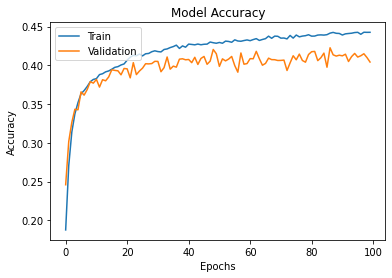

In [15]:
#Plot of Accuracy
import matplotlib.pyplot as plt

plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

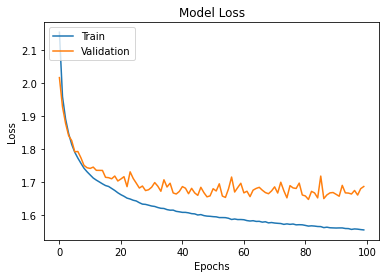

In [16]:
#Plot of loss 
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [17]:
#Last initializer
#pick values from truncated normal distribution any value beyond 99.5 conf interval or 2 std dev from mean 
model = Sequential()
initial_truncnorm = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1)
model.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 72us/step - loss: 2.1242 - accuracy: 0.2005 - val_loss: 1.9827 - val_accuracy: 0.2562
Epoch 2/100
40000/40000 [==============================] - 3s 71us/step - loss: 1.9191 - accuracy: 0.2995 - val_loss: 1.8956 - val_accuracy: 0.3126
Epoch 3/100
40000/40000 [==============================] - 3s 71us/step - loss: 1.8474 - accuracy: 0.3344 - val_loss: 1.8322 - val_accuracy: 0.3390
Epoch 4/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.8100 - accuracy: 0.3464 - val_loss: 1.8314 - val_accuracy: 0.3408
Epoch 5/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.7858 - accuracy: 0.3569 - val_loss: 1.7918 - val_accuracy: 0.3564
Epoch 6/100
40000/40000 [==============================] - 3s 72us/step - loss: 1.7696 - accuracy: 0.3639 - val_loss: 1.7777 - val_accuracy: 0.3549
Epoch 7/100
40000/40000 [==============================] - 3s 

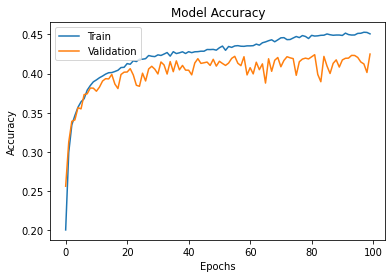

In [19]:
#plot results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [ ]:
#Plot of loss 
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

Based on the accuracy plots. It was observed that the highest accuracy was found for the 1st initializer (fixing to constant value)

In [22]:
model_new = Sequential()
initial = keras.initializers.Constant(value=0.45)
model_new.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_new.add(Dense(units=30, activation='relu'))
model_new.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_new.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])
history_new = model_new.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 3s 74us/step - loss: 2.1166 - accuracy: 0.2018 - val_loss: 1.9600 - val_accuracy: 0.2776
Epoch 2/100
40000/40000 [==============================] - 3s 73us/step - loss: 1.9108 - accuracy: 0.3014 - val_loss: 1.9165 - val_accuracy: 0.3050
Epoch 3/100
40000/40000 [==============================] - 3s 73us/step - loss: 1.8472 - accuracy: 0.3320 - val_loss: 1.8280 - val_accuracy: 0.3503
Epoch 4/100
40000/40000 [==============================] - 3s 72us/step - loss: 1.8101 - accuracy: 0.3469 - val_loss: 1.7985 - val_accuracy: 0.3586
Epoch 5/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.7835 - accuracy: 0.3564 - val_loss: 1.7962 - val_accuracy: 0.3560
Epoch 6/100
40000/40000 [==============================] - 3s 70us/step - loss: 1.7680 - accuracy: 0.3604 - val_loss: 1.7756 - val_accuracy: 0.3670
Epoch 7/100
40000/40000 [==============================] - 3s 

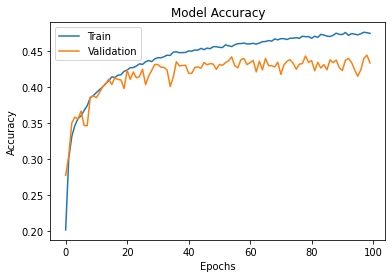

In [23]:
#plot results
import matplotlib.pyplot as plt

plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

In [30]:
from keras.layers import Conv2D, MaxPooling2D

In [35]:
model_f= Sequential()
initial = keras.initializers.Constant(value=0.45)
model_f.add(Dense(units=10, activation='relu', input_dim = 3072, kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_f.add(Dense(units=30, activation='relu'))
model_f.add(Dense(units=30, activation='relu'))
model_f.add(Dense(units=10, activation='softmax', kernel_initializer = 'random_uniform', bias_initializer='random_uniform'))
model_f.compile(loss='categorical_crossentropy', optimizer = 'sgd', metrics =['accuracy'])

history_final = model_final.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 126us/step - loss: 2.2736 - accuracy: 0.1369 - val_loss: 2.1412 - val_accuracy: 0.1970
Epoch 2/100
40000/40000 [==============================] - 3s 75us/step - loss: 2.0208 - accuracy: 0.2366 - val_loss: 2.0155 - val_accuracy: 0.2512
Epoch 3/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.9268 - accuracy: 0.2889 - val_loss: 1.9019 - val_accuracy: 0.3147
Epoch 4/100
40000/40000 [==============================] - 3s 74us/step - loss: 1.8692 - accuracy: 0.3215 - val_loss: 1.8872 - val_accuracy: 0.3139
Epoch 5/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.8175 - accuracy: 0.3424 - val_loss: 1.8037 - val_accuracy: 0.3502
Epoch 6/100
40000/40000 [==============================] - 3s 75us/step - loss: 1.7774 - accuracy: 0.3566 - val_loss: 1.7674 - val_accuracy: 0.3584
Epoch 7/100
40000/40000 [==============================] - 3s

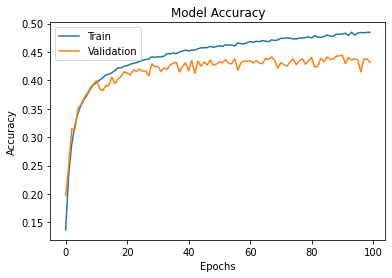

In [36]:
#plot results
import matplotlib.pyplot as plt

plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')

Try again with CNN

In [46]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [47]:
#normalizing inputs from 0-255 to 0.0-1.0 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train = X_train / 255.0 
X_test = X_test / 255.0

In [52]:
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [37]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils 
from keras import backend as K 

In [53]:
model= Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(Dropout(0.2)) 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dropout(0.2)) 
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3))) 
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_f = model.fit(X_train, y_train, validation_data =(X_test,y_test), epochs=10, batch_size=100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 380s 8ms/step - loss: 1.3857 - accuracy: 0.4984 - val_loss: 1.2561 - val_accuracy: 0.5516
Epoch 2/10
50000/50000 [==============================] - 380s 8ms/step - loss: 1.1194 - accuracy: 0.6028 - val_loss: 0.9841 - val_accuracy: 0.6554
Epoch 3/10
50000/50000 [==============================] - 376s 8ms/step - loss: 0.9324 - accuracy: 0.6713 - val_loss: 0.8899 - val_accuracy: 0.6915
Epoch 4/10
50000/50000 [==============================] - 379s 8ms/step - loss: 0.8001 - accuracy: 0.7198 - val_loss: 0.8000 - val_accuracy: 0.7254
Epoch 5/10
50000/50000 [==============================] - 376s 8ms/step - loss: 0.7062 - accuracy: 0.7523 - val_loss: 0.7205 - val_accuracy: 0.7539
Epoch 6/10
50000/50000 [==============================] - 379s 8ms/step - loss: 0.6300 - accuracy: 0.7780 - val_loss: 0.7397 - val_accuracy: 0.7490
Epoch 7/10
50000/50000 [==============================] - 379s

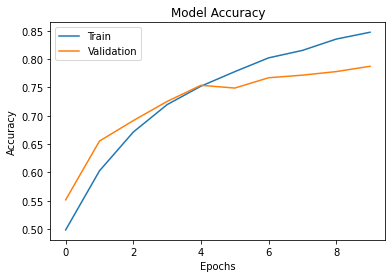

In [60]:
#plot accuracy
import matplotlib.pyplot as plt

plt.plot(history_f.history['accuracy'])
plt.plot(history_f.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper left')